# **Problem Statement :**

In the following diagram let blue circles indicate positive examples and orange squares indicate negative examples. We want to use k-NN algorithm for classifying the points. If k=3, find the class of the point (6,6). Extend the same example for Distance-Weighted k-NN and Locally weighted Averaging

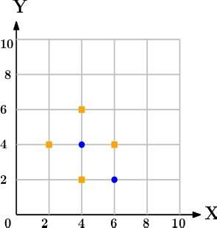

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used
for both classification as well as regression predictive problems. However, it is mainly used for
classification predictive problems in industry. It takes a bunch of labeled points and uses them to learn how to label other points. It is supervised because you are trying to classify a point based on the known classification of other points.

By observing the given data we can conclude that the input features and output labels are distinctly known, hence satisfying the rules necessary for the use of supervised learning.




## Objectives:
* **Evaluate** the significance of distance measures and k value in k Nearest Neighbors algorithm

* **Analyze** the data and determine why k-NN is the adviced method for the given task

* **Apply** k Nearest Neighbors algorithm on the given data

* **Understand and Remember** k Nearest Neighbors algorithm and its variations

# **Choosing the right value for K  .**

Here are some things to keep in mind:

---



1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green. 

2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. 

3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker

## Programmer's Perspective:

Let S be the programmer's perspective of the linear regression, such that S = {s, e, X, Y, $f_{me}$, $f_{i}^{f}$ $Mem_{shared}$| Φ}

s = Start State
- {($X_{i}$, $y_{i}$): i ∈ N, $X_{i}$ = ($X_{i}^{0}$,$X_{i}^{1}$), $X_{i}^{0}$ $\large \epsilon$ $\mathbb{R}$, $X_{i}^{1}$ $\large \epsilon$ $\mathbb{R}$, $y_{i}$ $\large \epsilon$ {orange, blue} }
- $X_{i}^{0}$ : x-coordinate
- $X_{i}^{1}$ : y-coordinate
- k = { number of neighbors }, k $\large \epsilon$ [3,length of the dataset]

e = { Mapping the given point with the appropriate class }

X = {X,y}
* X: Feature values
    - x: { x-coordinate | $x$ $\large \epsilon$ $\mathbb{R}$ }
    - y: { y-coordinate | $y$ $\large \epsilon$ $\mathbb{R}$ }
    - k: { number of neighbors | k $\large \epsilon$ [3,length of the dataset] }
* y: Output values =  { $ y_i $ | $ y_i $ is the predicted class for point $ X_i $, $ y_i $ $ \large \epsilon $ {orange, blue}, $ i $ $ \large \epsilon $ $ \mathbb{N} $ },

$f_{me}$ = Function $f_{me}$ can be defined as $\large f_{me}: X \rightarrow y$<br>
$f_{me}$: { KNearestNeighbors | X = (df, k, input_val, weight, metric), y=prediction}
   - df : {(X,y)}
   - k : { number of neighbors }, k $\large \epsilon$ [3,length of the dataset] 
   - input_val : { x, y | x=x-coordinate, y=y-coordinate }
   - weight : { type of k-NN }, weight $\large \epsilon $ {distance, uniform}
   - metric : { method for distance calculation }, metric $\large \epsilon $ {manhatten, euclidean}
   - y = prediction: { output label | y $\large \epsilon $ {blue, orange} }
   - Method to implement k nearest neighbors algorithm

$f_{i}^{f}$ = friend functions: {$ f_1 $, $ f_2 $, $ f_3 $}
For ever function $f_{i}$ in $f_{i}^{f}$:<br> 
$$\large f_{i}: X \rightarrow y$$

- f1: { euclidean_distance | X=(point_a, point_b), y=distance }
    - point_a, point_b : { coordinates of a point in the dataset }
    - y = distance : { Euclidean distance between two points }, distance $\large \epsilon $ [0, $\infty$)
    - Method to calculate euclidian distance between two points point_a and point_b
    
    
- f2: { manhattan_distance | X=(point_a, point_b), y=distance }
    - point_a, point_b : { coordinates of a point in the dataset }
    - y = distance : { Manhattan distance between two points }, distance $\large \epsilon $ [0, $\infty$)
    - Method to calculate manhattan distance between two points point_a and point_b
    
    
- f3: { weighted_prediction | X = nearest_neighbors, y = prediction } 
    - nearest_neighbors: { [($X_{0}^{0}$,$X_{0}^{1}$), ($X_{1}^{0}$,$X_{1}^{1}$),... ($X_{k-1}^{0}$,$X_{k-1}^{1}$)] | $X_{i}^{0}$ = x-coordinate, $X_{i}^{1}$ = y-coordinate }
    - y = prediction: { output label | y $\large \epsilon $ {blue, orange} }
    - Method to predict class based on the weighted frequency of nearest neighbors
    
$Mem_{shared}$ = { Shared resource for all threads to store prediction for given set of input }

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import threading
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
data = {
    'x': [2, 4, 4, 4, 6, 6], 
    'y': [4, 2, 4, 6, 2, 4],
    'label':["orange", "orange", "blue", "orange", "blue", "orange"]
} 
df = pd.DataFrame.from_dict(data) 
label = "label"

In [3]:
df.head()

,x,y,label
0,2,4,orange
1,4,2,orange
2,4,4,blue
3,4,6,orange
4,6,2,blue


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,6.0,4.333333,1.505545,2.0,4.0,4.0,5.5,6.0
y,6.0,3.666667,1.505545,2.0,2.5,4.0,4.0,6.0


In [5]:
df['label'].value_counts()

orange    4
blue      2
Name: label, dtype: int64

In [ ]:
df.shape

(6, 3)

In [6]:
# Function to validate the provided data to k-NN algorithm
def check_data(df, k, input_val, weight, metric):
    if len(input_val) != df.shape[1]-1:
        print("Provided input points are invalid")
        return False
    if k > len(df):
        print("k value cannot be greater than size of the dataset")
        return False
    if weight not in ['distance', 'uniform']:
        print("Param weight takes values distance or uniform")
        return False
    if metric not in ['manhattan','euclidean']:
        print("Param metric takes values manhattan or euclidean")
        return False
    return True

In [7]:
# Function to calculate euclidean distance between two points
def euclidean_distance(point_a, point_b):
    '''
    params: {point_a, point_b}
    - point_a, point_b : { coordinates of a point in the dataset }
    - type : list
    
    - returns: {distance}
    - distance : { Euclidean distance between point_a and point_b }
    - type: float
    '''
    distance = 0
    for i in range(len(point_a)):
        distance = distance + (point_a[i]-point_b[i])**2
    return distance**0.5

In [8]:
# Function to calculate manhattan distance between two points
def manhattan_distance(point_a, point_b):
    '''
    params: {point_a, point_b}
    - point_a, point_b : { coordinates of a point in the dataset }
    - type : list
    
    - returns: {distance}
    - distance : { Manhattan distance between point_a and point_b }
    - type: float
    '''
    distance = 0
    for i in range(len(point_a)):
        distance = distance + abs(point_a[i]-point_b[i])
    return distance

In [9]:
# Method to predict class based on the weighted frequency of nearest neighbors
def weighted_prediction(nearest_neighbors):
    '''
    params: {nearest_neighbors}
    - nearest_neighbors : { distance and class of k points from the dataset, nearest to input value }
    - type : list - [(distance, class),(distance, class), ...]
    
    - returns: {prediction}
    - prediction : { Output label i.e blue or orange }
    - type: string
    '''
    label_frequency = {}
    # Calculate weight for each label
    for distance, label in nearest_neighbors:
        if int(distance) == 0:
            label_frequency[label] = sys.maxsize
            break
        if label in label_frequency:
            label_frequency[label] += 1/distance
        else: label_frequency[label] = 1/distance
    # Return label having maximum weight
    return max(label_frequency, key=label_frequency.get) 

In [10]:
def chooseK(arr):
    print("Size of array :",arr.shape[0])
    k=round(math.sqrt(arr.shape[0]))
    if(k%2==0):
      
        k=k+1;
    #k should be odd so that classfication can be done properly(No chance of 50%-50% classification)
    print("Choosen value of K : ",k)
    return k;

In [11]:
# Method to implement k nearest neighbors algorithm
def KNearestNeighbors(X, y, k, input_val, weight, metric):
    '''
    params: {X, y, k, input_val, weight, metric}
    - X : { Input data }
    - type : list 
    
    - y : {Ouput label}
    - type : list
    
    - k : { number of neighbors }
    - type : int
    
    - input_val : { value for which output label is to be determined }
    - type : list - [x-coordinate, y-coordinate]
    
    - weight : { type of k-NN }
    - type : string
    
    - metric : { method for calculating distance }
    - type : string
    
    - returns: {prediction}
    - prediction : { Output label i.e blue or orange }
    - type: string
    '''
    # Calculate distance depending on the metrics
    distances = []
    if metric == 'manhattan':
        for i in range(len(X)):
            distances.append((manhattan_distance(X[i], input_val),y[i]))
    else:
        for i in range(len(X)):
            distances.append((euclidean_distance(X[i], input_val),y[i]))
                
    # Sort points according to the calculated distance 
    distances.sort(key=lambda distance: distance[0])
    if weight == 'distance': # Perform prediction using distance as weight
        nearest_neighbors = distances[:k].copy()
        prediction = weighted_prediction(nearest_neighbors)
    else: # Perform prediction based on frequency of ouput label in nearest neighbors(uniform)
        nearest_neighbors = distances[:k].copy()
        if int(distances[0][0]) == 0:
            prediction = distances[0][1]
            return prediction
        neighbor_classes = [label[1] for label in nearest_neighbors]
        prediction = max(set(neighbor_classes), key=neighbor_classes.count)
    return prediction

In [15]:
k = 3
metric = 'euclidean'
weight = 'uniform'
input_val = [4,4]
X=None
y=None
if check_data(df, k, input_val, weight, metric):
    X = df.drop(columns=[label]).values.tolist()
    y = df[label].values.tolist()
    print("Predicted value: ",KNearestNeighbors(X, y, k, input_val, weight, metric))

Predicted value:  blue


In [13]:
# Function to take input values from the user
def predict(X,y):
    '''
    params: {X, y, k, input_val, weight, metric}
    - X : { Input data }
    - type : list 
    
    - y : {Ouput label}
    - type : list
    
    - returns: {prediction}
    - prediction : { Output label i.e blue or orange }
    - type: string
    '''
    x_c = float(input('Enter x-coordinate: '))
    y_c = float(input('Enter y-coordinate: '))
    
    k = 3
        
    '''flag = True
    while flag:
        k = int(input('Enter k value: '))
        if k<3 or k>len(X):
            print("Please select provide a valid k value!")
        else:
            flag = False '''
        
    flag = True
    while flag:
        weight_inp = int(input('For distance weighted K-NN enter 1 otherwise enter 0: '))
        if weight_inp not in [0,1]:
            print("Please select provide a valid input!")
        else:
            if weight_inp == 1: weight = 'distance'
            else: weight = 'uniform'
            flag = False
    
    flag = True
    while flag:
        metric_inp = int(input('Metric - For manhatten distance enter 0 for euclidean distance enter 1: '))
        if metric_inp not in [0,1]:
            print("Please select provide a valid input!")
        else:
            if metric_inp == 1: metric = 'manhattan'
            else: metric = 'euclidean'
            flag = False
    print("\nPredicted value: ",KNearestNeighbors(X, y,  k, [x_c,y_c], weight=weight, metric=metric))
    return {'k':k, 'input_val': [x_c,y_c], 'weight':weight, 'metric':metric}

In [20]:
input_dict = predict(X, y)

Enter x-coordinate: 6
Enter y-coordinate: 2
For distance weighted K-NN enter 1 otherwise enter 0: 0
Metric - For manhatten distance enter 0 for euclidean distance enter 1: 1

Predicted value:  blue
